# Machine Learning - Cluster

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Cleaning data
#### 3. The elbow technique
#### 4. k-means clustering
#### 5. Descriptive statistics for the clusters

## 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Amy Yip\Desktop\Career Foundry Data Analytics\Achievement 6 Advanced Analytics and Dashboard Designs\07-05-2022 Melbourne Housing Analysis'

In [4]:
# Import cleaned data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '6.1_melb_housing_clean_data_new.pkl'))

In [5]:
df.shape

(15359, 18)

In [6]:
df.head()

,Date Sold,Price,Year Built,Land Size,Property Area Size,Property Type,Num of Rooms,Num of Bathrooms,Num of Car Spaces,Distance to CBD,Suburb,Postcode,Council Area,Council Area1,Latitude,Longitude,Region,Property Vicinity Count
1,3/12/2016,1480000.0,NaN,202.0,NaN,house/cottage/villa/terrace,2,1.0,1.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,4/02/2016,1035000.0,1900.0,156.0,79.0,house/cottage/villa/terrace,2,1.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,4/03/2017,1465000.0,1900.0,134.0,150.0,house/cottage/villa/terrace,3,2.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,4/03/2017,850000.0,NaN,94.0,NaN,house/cottage/villa/terrace,3,2.0,1.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,4/06/2016,1600000.0,2014.0,120.0,142.0,house/cottage/villa/terrace,4,1.0,2.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
df.dtypes

Date Sold                   object
Price                      float64
Year Built                  object
Land Size                  float64
Property Area Size         float64
Property Type               object
Num of Rooms                 int64
Num of Bathrooms           float64
Num of Car Spaces          float64
Distance to CBD            float64
Suburb                      object
Postcode                    object
Council Area                object
Council Area1               object
Latitude                   float64
Longitude                  float64
Region                      object
Property Vicinity Count    float64
dtype: object

## 02. Cleaning data

In [8]:
# Check for missing values

df.isnull().sum()

Date Sold                     0
Price                         0
Year Built                 6420
Land Size                     0
Property Area Size         7369
Property Type                 0
Num of Rooms                  0
Num of Bathrooms              0
Num of Car Spaces             0
Distance to CBD               0
Suburb                        0
Postcode                      0
Council Area                  0
Council Area1                 0
Latitude                     18
Longitude                    18
Region                        0
Property Vicinity Count       0
dtype: int64

In [9]:
# Create a subset of the dataframe NOT containing the missing values from 'Price'

df1= df[df['Property Area Size'].isnull() == False]

In [10]:
df1.head()

,Date Sold,Price,Year Built,Land Size,Property Area Size,Property Type,Num of Rooms,Num of Bathrooms,Num of Car Spaces,Distance to CBD,Suburb,Postcode,Council Area,Council Area1,Latitude,Longitude,Region,Property Vicinity Count
2,4/02/2016,1035000.0,1900.0,156.0,79.0,house/cottage/villa/terrace,2,1.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,4/03/2017,1465000.0,1900.0,134.0,150.0,house/cottage/villa/terrace,3,2.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
6,4/06/2016,1600000.0,2014.0,120.0,142.0,house/cottage/villa/terrace,4,1.0,2.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
11,7/05/2016,1876000.0,1910.0,245.0,210.0,house/cottage/villa/terrace,3,2.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
14,8/10/2016,1636000.0,1890.0,256.0,107.0,house/cottage/villa/terrace,2,1.0,2.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [11]:
# Create a subset to exclude categorical variables since they can't be included in the k-means

df_sub = df1[['Price', 'Land Size', 'Property Area Size', 'Num of Rooms', 'Num of Bathrooms', 'Num of Car Spaces', 'Distance to CBD', 'Property Vicinity Count']]

## 03. The elbow technique

In [12]:
df_sub.head()

,Price,Land Size,Property Area Size,Num of Rooms,Num of Bathrooms,Num of Car Spaces,Distance to CBD,Property Vicinity Count
2,1035000.0,156.0,79.0,2,1.0,0.0,2.5,4019.0
4,1465000.0,134.0,150.0,3,2.0,0.0,2.5,4019.0
6,1600000.0,120.0,142.0,4,1.0,2.0,2.5,4019.0
11,1876000.0,245.0,210.0,3,2.0,0.0,2.5,4019.0
14,1636000.0,256.0,107.0,2,1.0,2.0,2.5,4019.0


In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3619783343297288.0,
 -1386757395932224.2,
 -713396603815453.1,
 -446899146630159.6,
 -309241100953934.25,
 -219334853484482.78,
 -154985970593129.0,
 -124872327102836.11,
 -99000986883145.62]

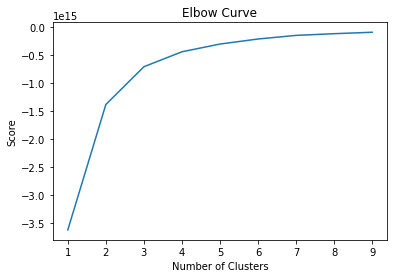

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal clusters are at 2 and 3. I have decided on 3 because the cluster groupings made more sense with this number after plotting the charts.

## 04. k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [17]:
## Fit the k-means object to the data.

kmeans.fit(df_sub)

C:\Users\Amy Yip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [18]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\Amy Yip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\AMYYIP~1\AppData\Local\Temp/ipykernel_37044/4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [19]:
df_sub.head()

,Price,Land Size,Property Area Size,Num of Rooms,Num of Bathrooms,Num of Car Spaces,Distance to CBD,Property Vicinity Count,clusters
2,1035000.0,156.0,79.0,2,1.0,0.0,2.5,4019.0,1
4,1465000.0,134.0,150.0,3,2.0,0.0,2.5,4019.0,0
6,1600000.0,120.0,142.0,4,1.0,2.0,2.5,4019.0,0
11,1876000.0,245.0,210.0,3,2.0,0.0,2.5,4019.0,0
14,1636000.0,256.0,107.0,2,1.0,2.0,2.5,4019.0,0


In [20]:
df_sub['clusters'].value_counts()

1    4922
0    2551
2     517
Name: clusters, dtype: int64

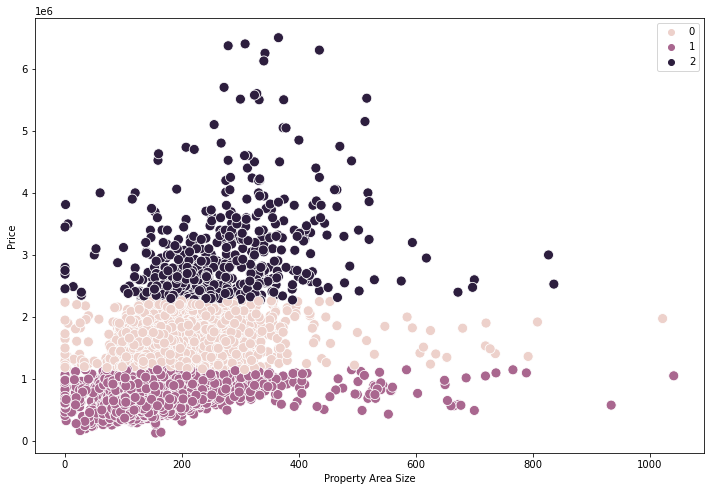

In [21]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Property Area Size'], y=df_sub['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Property Area Size') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

Not recommended to use discrete variables in clustering analysis.

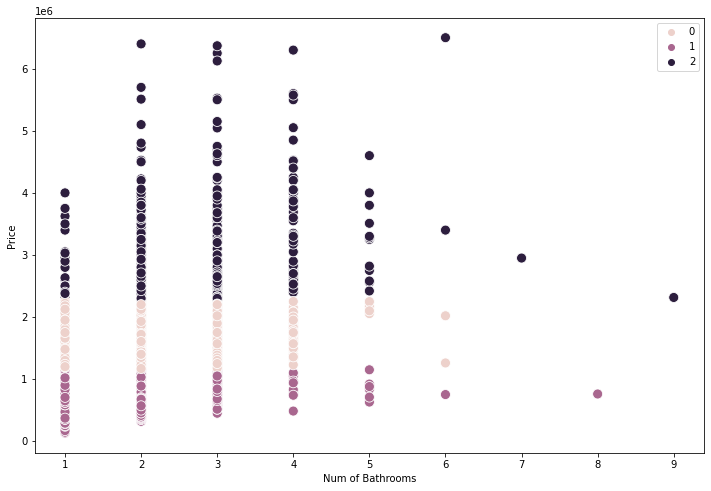

In [22]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Num of Bathrooms'], y=df_sub['Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Num of Bathrooms') 
plt.ylabel('Price') 
plt.show()

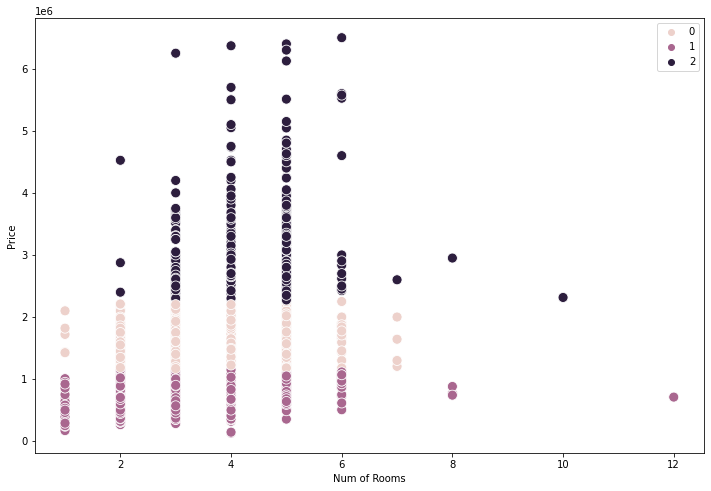

In [23]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Num of Rooms'], y=df_sub['Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Num of Rooms') 
plt.ylabel('Price') 
plt.show()

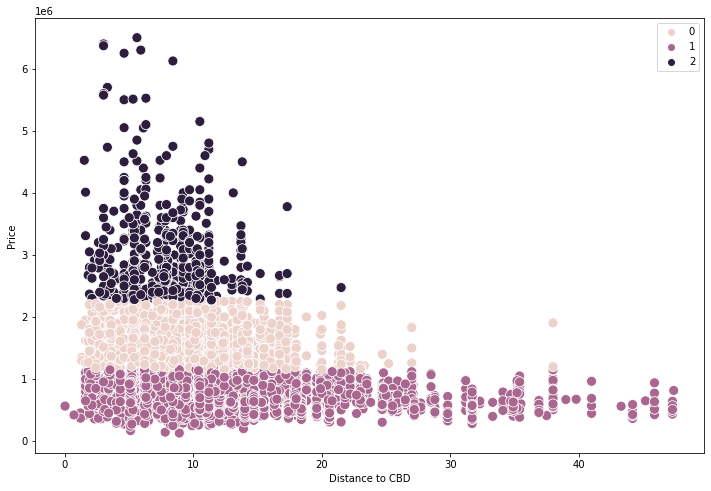

In [24]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Distance to CBD'], y=df_sub['Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Distance to CBD') 
plt.ylabel('Price') 
plt.show()

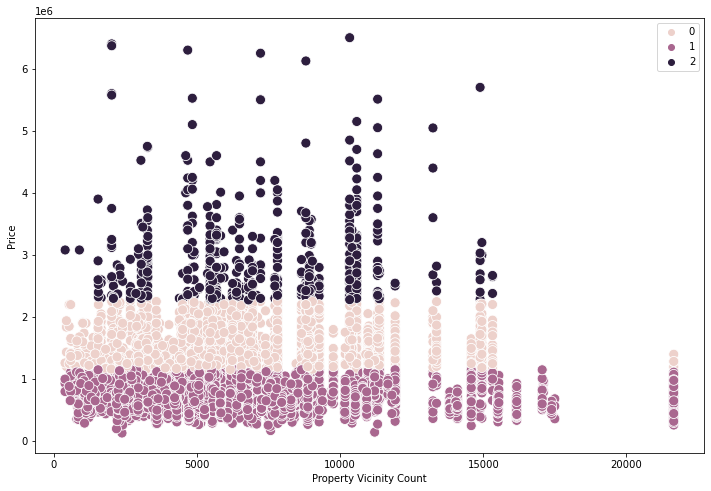

In [25]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Property Vicinity Count'], y=df_sub['Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Property Vicinity Count') 
plt.ylabel('Price') 
plt.show()

The cluster analysis have categorised the data set into three groups based on pricing with purple, dark purple and light pink representing the high, middle, lower priced properties. 

Looking at the cluster charts, it appears the property area size, distance to CBD, and number of rooms and bathrooms variables do not have much of an influence on the pricing. 

On the other hand, distance to CBD variable proves to have a stronger impact on pricing as the cluster chart shows the most expensive properties are closer to the CBD, while the lowest priced properties can be located at the furtherest distance from CBD.

## 05. Descriptive statistics for the clusters

In [36]:
# The loc function is used to relabel the clusters from numbers to color names, making them easier to work with.

df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\Amy Yip\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [37]:
# The loc function is used to relabel the clusters from numbers to color names, making them easier to work with.

df_sub.loc[df_sub['clusters'] == 2, 'cluster1'] = 'high price'
df_sub.loc[df_sub['clusters'] == 1, 'cluster1'] = 'low price'
df_sub.loc[df_sub['clusters'] == 0, 'cluster1'] = 'medium price'

In [38]:
df_sub.head()

,Price,Land Size,Property Area Size,Num of Rooms,Num of Bathrooms,Num of Car Spaces,Distance to CBD,Property Vicinity Count,clusters,cluster,cluster1
2,1035000.0,156.0,79.0,2,1.0,0.0,2.5,4019.0,1,purple,low price
4,1465000.0,134.0,150.0,3,2.0,0.0,2.5,4019.0,0,light pink,medium price
6,1600000.0,120.0,142.0,4,1.0,2.0,2.5,4019.0,0,light pink,medium price
11,1876000.0,245.0,210.0,3,2.0,0.0,2.5,4019.0,0,light pink,medium price
14,1636000.0,256.0,107.0,2,1.0,2.0,2.5,4019.0,0,light pink,medium price


In [28]:
df_sub.groupby('cluster').agg({ 
                         'Property Area Size':['mean', 'median'],
                         'Num of Bathrooms':['mean', 'median'], 
                         'Num of Rooms':['mean', 'median'],
                         'Distance to CBD':['mean', 'median'],
                         'Price':['mean', 'median']})

Property Area Size        Num of Bathrooms        Num of Rooms  \
                          mean median             mean median         mean   
cluster                                                                      
dark purple         271.113305  264.0         2.599613    2.0     4.179884   
light pink          179.890810  165.0         1.865543    2.0     3.498236   
purple              136.856351  124.0         1.527834    1.0     3.033929   

                   Distance to CBD                Price             
            median            mean median          mean     median  
cluster                                                             
dark purple    4.0        7.836364    7.8  2.989940e+06  2750000.0  
light pink     3.0        9.153665    8.5  1.545443e+06  1474000.0  
purple         3.0       13.756887   12.4  7.578121e+05   753500.0

Judging by the descriptive statistics we can state a few facts:
- The purple cluster denoting the most expensive properties have the highest property area size mean value, the highest number of bathrooms and rooms median values, and lowest distance to CBD mean value which support my hypothesis. These numbers supports that high value properties generally are larger in size, have higher number of bathrooms and rooms, and are in closer proximity to the CBD.
- On the contrary, the light purpple representing the lower priced properities have the lowest property area size mean value, the lowest number of bathrooms and rooms median values, and lowest distance to CBD mean value. These numbers represents that low value properties generally are smaller in size, have less number of bathrooms and rooms, and are in further away from the CBD.  

At first glance the cluster analysis could not tell as much due to the density of the data plots. However, the descriptive statistics here are able to provide a more insightful information in regards to the relationship of the variables with pricing.

In [41]:
# Export as excel file

df_sub.to_excel(os.path.join(path, '02 Data', 'Prepared Data', '6.5 Cluster Analysis.xlsx'), index = False, header=True)